In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

dataset_path = '/content/drive/MyDrive/University susmita/CSE422/Project_folder_group3/Car_fuel consumption dataset.csv'
df= pd.read_csv(dataset_path)



<ipython-input-3-58f547bfd6e4>:2: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(dataset_path)


In [ ]:
df

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,90,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38109,37547,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,52,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38110,37548,2017,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,53,SIDI,...,0.0,0,0,0,0,0.0,0.0,NaN,0.00,0.0
38111,37703,2017,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,54,SIDI; PHEV,...,0.0,29,32,30,0,0.0,0.0,NaN,13.84,13.3


In [ ]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (38113, 81)


In [ ]:
print("Dataset description: ")
df.describe()

Dataset description: 


,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,supercharger,fuel_type_2,city_mpg_ft1,unrounded_city_mpg_ft1,city_mpg_ft2,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
count,38113.000000,38113.000000,38113.000000,37977.000000,37979.000000,0.0,0.0,38113.000000,38113.000000,38113.000000,...,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,38113.000000,0.0,38113.000000,38113.000000
mean,19170.638496,2000.194527,8799.389001,5.736656,3.317583,NaN,NaN,17.981109,4.606426,0.546218,...,0.005549,0.082203,0.080891,0.081311,0.469708,0.426249,0.419197,NaN,0.043973,0.040051
std,11134.878665,10.464573,17781.058490,1.752254,1.361995,NaN,NaN,6.849728,10.113963,4.109282,...,0.161014,2.156682,2.052187,2.097794,9.352069,9.104702,9.315914,NaN,1.311628,1.169281
min,1.000000,1984.000000,0.000000,2.000000,0.000000,NaN,NaN,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,9529.000000,1991.000000,0.000000,4.000000,2.200000,NaN,NaN,15.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
50%,19058.000000,2001.000000,212.000000,6.000000,3.000000,NaN,NaN,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
75%,28779.000000,2009.000000,4451.000000,6.000000,4.300000,NaN,NaN,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
max,38542.000000,2017.000000,69102.000000,16.000000,8.400000,NaN,NaN,150.000000,150.000000,145.000000,...,7.000000,97.000000,81.000000,88.000000,315.000000,305.900000,346.900000,NaN,103.030000,90.550000


In [ ]:
print(f"dataset data type: ")

df.dtypes

dataset data type: 


,0
vehicle_id,int64
year,int64
make,object
model,object
class,object
...,...
city_range_ft1,float64
highway_range_ft1,float64
range_ft2,float64
city_range_ft2,float64


In [ ]:
df.select_dtypes(include=['object'])

,make,model,class,drive,transmission,transmission_type,engine_descriptor,turbocharger,fuel_type,fuel_type_1,gas_guzzler_tax,my_mpg_data,alternative_fuel_technology
0,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,(FFS),NaN,Regular,Regular Gasoline,NaN,N,NaN
1,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,(FFS) CA model,NaN,Regular,Regular Gasoline,NaN,N,NaN
2,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,(FFS),NaN,Regular,Regular Gasoline,NaN,N,NaN
3,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,(FFS) CA model,NaN,Regular,Regular Gasoline,NaN,N,NaN
4,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,(FFS),NaN,Regular,Regular Gasoline,NaN,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38108,Volvo,XC60 FWD,Small Sport Utility Vehicle 2WD,Front-Wheel Drive,Automatic (S8),NaN,SIDI,True,Regular,Regular Gasoline,NaN,N,NaN
38109,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,SIDI,True,Premium,Premium Gasoline,NaN,N,NaN
38110,Volvo,XC90 AWD,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,SIDI,True,Premium,Premium Gasoline,NaN,N,NaN
38111,Volvo,XC90 AWD PHEV,Standard Sport Utility Vehicle 4WD,All-Wheel Drive,Automatic (S8),NaN,SIDI; PHEV,True,Premium and Electricity,Premium Gasoline,NaN,N,Plug-in Hybrid


# **Visualise**

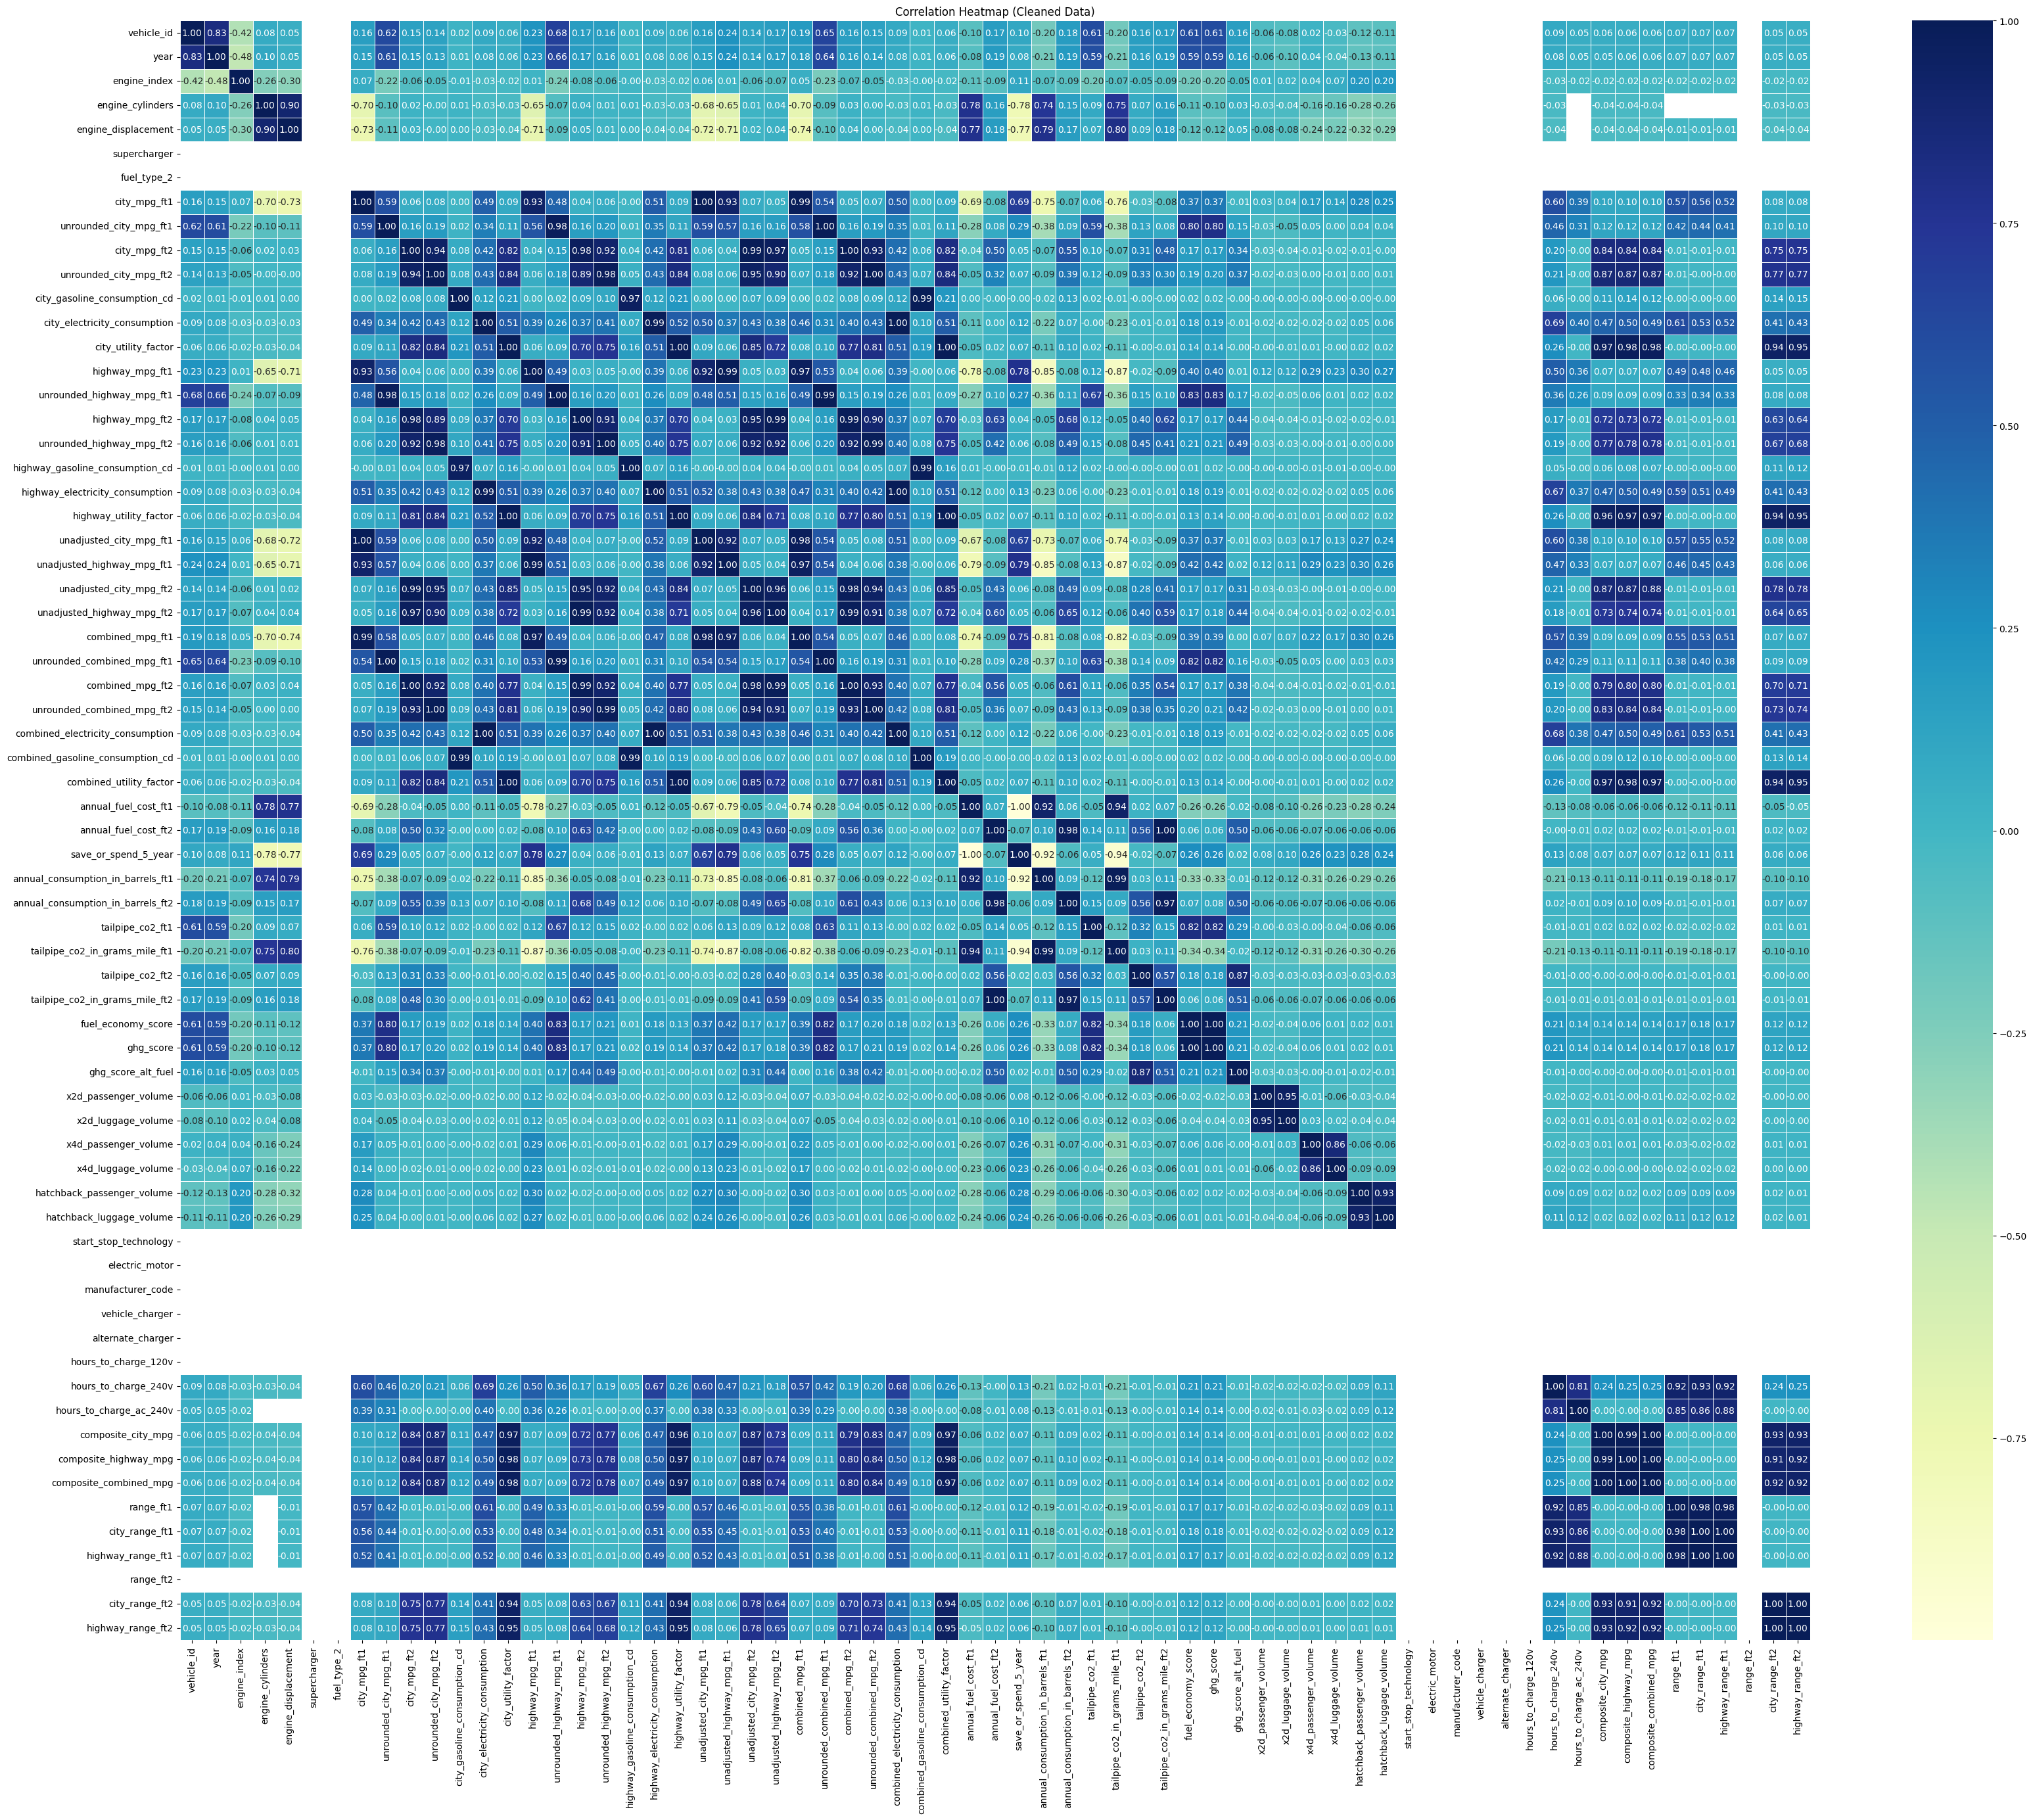

In [ ]:
import seaborn as sns
df_numeric = df.select_dtypes(include=['number'])


corr = df_numeric.corr()


plt.figure(figsize=(40, 32))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Cleaned Data)')
plt.show()


In [ ]:
print("Unique Labels in the dependent column: ", df["tailpipe_co2_ft1"].unique())

print("The number of occurences of the unique labels:\n", df["tailpipe_co2_ft1"].value_counts())

Unique Labels in the dependent column:  [ -1   0  84  87 169 133 322 361 228 500 387 401 385 421 442 349 394 373
 482 585 550 579 381 376 342 374 379 343 320 414 418 424 460 565 396 389
 395 429 337 499 480 486 413 439 440 475 345 432 646 633 488 580 517 604
 688 427 407 433 404 324 326 332 348 341 340 446 461 325 415 420 375 458
 327 371 454 510 476 473 459 402 403 584 317 346 350 562 563 552 544 516
 372 416 634 465 478 547 847 494 351 453 312 409 363 344 408 366 426 641
 411 554 462 428 431 570 581 612 430 448 524 520 399 436 487 463 533 496
 457 300 336 298 309 295 273 481 347 527 598 617 740 670 705 717 410 310
 423 531 618 573 625 290 305 276 321 301 284 265 714 724  81 378 383 477
 425 503 495 523 292 328 285 280 279 558 479 445 419 609 567 674 664 692
 679 293 129 229 642 630 666 645 755 782 687 370 356 357 364 606 450 471
 393 599 519 470 663 505 557 675 275 272 437 294 304 278 358 318 306 215
 386 438 490 392 532 564 623 307 365 353 288 354 200 218 244 266 384 406
 216 447 29

In [ ]:
class_counts = df['tailpipe_co2_ft1'].value_counts()

print(class_counts)

tailpipe_co2_ft1
-1      31953
 0        133
 415       51
 347       51
 305       47
        ...  
 241        1
 29         1
 199        1
 602        1
 594        1
Name: count, Length: 506, dtype: int64


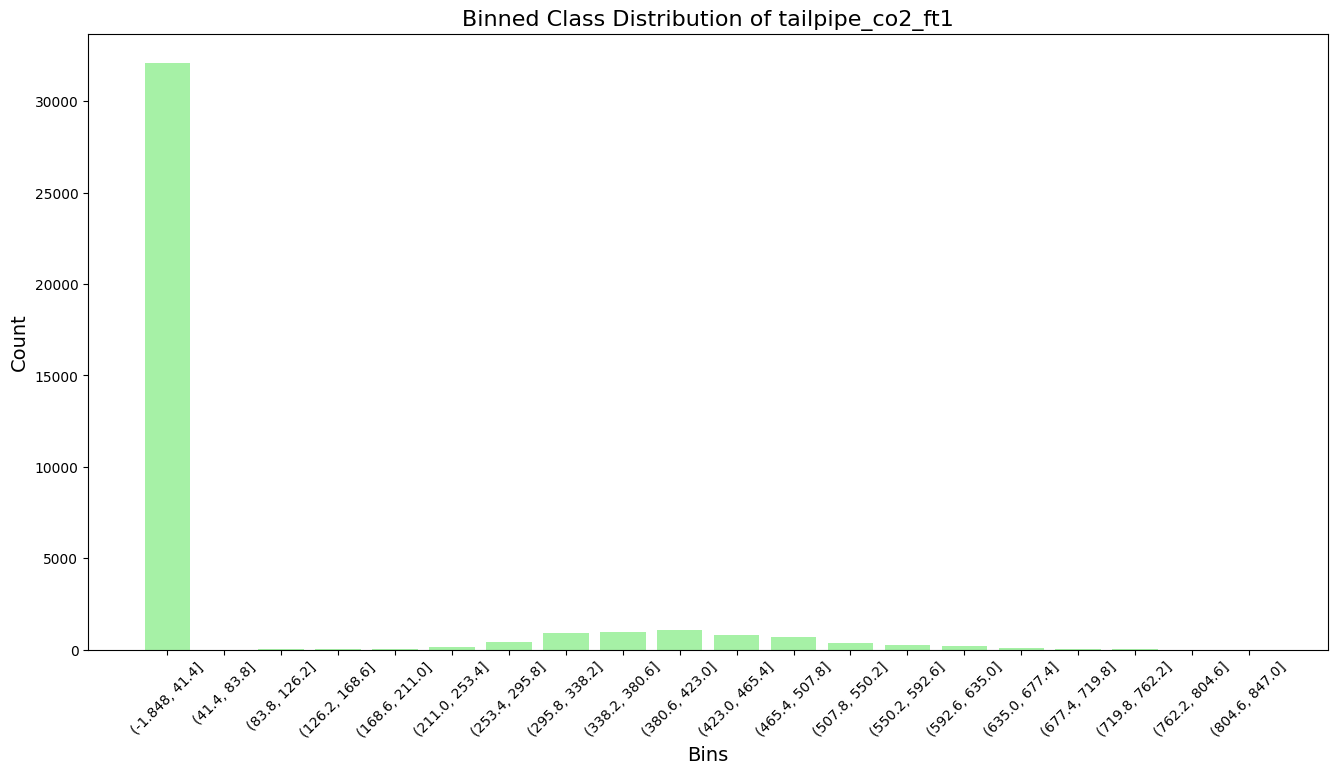

In [ ]:
# Bin the classes into intervals
bins = 20  # Adjust as necessary
df['binned_classes'] = pd.cut(df['tailpipe_co2_ft1'], bins=bins)
binned_counts = df['binned_classes'].value_counts().sort_index()

# Plot the binned distribution
plt.figure(figsize=(16, 8))
plt.bar(binned_counts.index.astype(str), binned_counts.values, color="lightgreen", alpha=0.8)
plt.title("Binned Class Distribution of tailpipe_co2_ft1", fontsize=16)
plt.xlabel("Bins", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()




# **Dataset** **Exploration**

**Columns** **with** **Null** **Value**

In [ ]:
print("Datset Null checking: ")
df.isnull().sum()

Datset Null checking: 


,0
vehicle_id,0
year,0
make,0
model,0
class,0
...,...
highway_range_ft1,0
range_ft2,38113
city_range_ft2,0
highway_range_ft2,0


## **Checking the dataset for nan, redundant and columns with all 0**

# **columns with all 0**

In [ ]:


columns_all_zeros = df.columns[(df == 0).all()]

#
zero_counts = (df== 0).sum()
columns_high_zeros = zero_counts[zero_counts > len(df) * 0.5].index


print('Columns with all zeros: ',columns_all_zeros.tolist())
print('Columns with high number of zeros: ',columns_high_zeros.tolist())
# columns_all_zeros.tolist(), columns_high_zeros.tolist()



Columns with all zeros:  ['hours_to_charge_120v']
Columns with high number of zeros:  ['unrounded_city_mpg_ft1', 'city_mpg_ft2', 'unrounded_city_mpg_ft2', 'city_gasoline_consumption_cd', 'city_electricity_consumption', 'city_utility_factor', 'unrounded_highway_mpg_ft1', 'highway_mpg_ft2', 'unrounded_highway_mpg_ft2', 'highway_gasoline_consumption_cd', 'highway_electricity_consumption', 'highway_utility_factor', 'unadjusted_city_mpg_ft2', 'unadjusted_highway_mpg_ft2', 'unrounded_combined_mpg_ft1', 'combined_mpg_ft2', 'unrounded_combined_mpg_ft2', 'combined_electricity_consumption', 'combined_gasoline_consumption_cd', 'combined_utility_factor', 'annual_fuel_cost_ft2', 'annual_consumption_in_barrels_ft2', 'tailpipe_co2_in_grams_mile_ft2', 'x2d_passenger_volume', 'x2d_luggage_volume', 'x4d_passenger_volume', 'x4d_luggage_volume', 'hatchback_passenger_volume', 'hatchback_luggage_volume', 'gasoline_electricity_blended_cd', 'hours_to_charge_120v', 'hours_to_charge_240v', 'hours_to_charge_ac_2

## **Columns with Nan and Redundant values**

In [ ]:

columns_with_nan = df.columns[df.isna().any()]
nan_counts = df[columns_with_nan].isna().sum()

#  (redundant)
redundant_columns = df.columns[df.nunique(dropna=True) == 1]


print('Columns With Nan',columns_with_nan.tolist())
print('Nan Counts',nan_counts.tolist())
print('Redundant Columns',redundant_columns.tolist())



Columns With Nan ['drive', 'transmission', 'transmission_type', 'engine_descriptor', 'engine_cylinders', 'engine_displacement', 'turbocharger', 'supercharger', 'fuel_type_2', 'gas_guzzler_tax', 'start_stop_technology', 'alternative_fuel_technology', 'electric_motor', 'manufacturer_code', 'vehicle_charger', 'alternate_charger', 'range_ft2']
Nan Counts [1189, 11, 23068, 15420, 136, 134, 32874, 38113, 38113, 37149, 38113, 35066, 38113, 38113, 38113, 38113, 38113]
Redundant Columns ['turbocharger', 'gas_guzzler_tax', 'hours_to_charge_120v']


# **Cleaning and Preprocessing the Dataset**

In [ ]:
#before cleaning
df.shape

(38113, 82)

# **Dataset cleaning**

In [ ]:
# Drop columns with more than 50% zeros or NaN values
threshold = len(df) * .5
df_cleaned = df.loc[:, (df.isna().sum() <= threshold) & ((df == 0).sum() <= threshold)]

# Drop columns with a single unique value (redundant columns)
df_cleaned = df_cleaned.loc[:, df_cleaned.nunique(dropna=True) > 1]
df_cleaned = df_cleaned.dropna(axis=0, how='any')
df_cleaned = df_cleaned.loc[~(df_cleaned == 0).all(axis=1)]
final_shape = df_cleaned.shape
print("Final dataset shape:", final_shape)


Final dataset shape: (21531, 29)


In [ ]:
df_corr = df_cleaned.select_dtypes(include=['number']).corr()
df_corr

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,unadjusted_city_mpg_ft1,unadjusted_highway_mpg_ft1,combined_mpg_ft1,annual_fuel_cost_ft1,save_or_spend_5_year,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_in_grams_mile_ft1,tailpipe_co2_ft2,fuel_economy_score,ghg_score,ghg_score_alt_fuel
vehicle_id,1.000000,0.910474,-0.418450,0.139809,0.091134,0.108704,0.200237,0.112071,0.213252,0.146103,-0.031401,0.033173,-0.155838,0.740607,-0.155237,0.237648,0.734277,0.733872,0.238747
year,0.910474,1.000000,-0.401753,0.120809,0.052637,0.145880,0.262681,0.148081,0.274939,0.193327,-0.070560,0.072288,-0.213034,0.764510,-0.212522,0.246452,0.757331,0.756870,0.247239
engine_index,-0.418450,-0.401753,1.000000,-0.332844,-0.375458,0.166068,0.056547,0.161604,0.049517,0.128206,-0.148443,0.147502,-0.120837,-0.300474,-0.125822,-0.099794,-0.297775,-0.297577,-0.099702
engine_cylinders,0.139809,0.120809,-0.332844,1.000000,0.906040,-0.706806,-0.640261,-0.693971,-0.640215,-0.694420,0.764229,-0.764073,0.725463,0.125278,0.737628,0.101708,-0.069533,-0.069588,0.046636
engine_displacement,0.091134,0.052637,-0.375458,0.906040,1.000000,-0.745041,-0.704238,-0.731896,-0.701406,-0.742851,0.769746,-0.769728,0.781377,0.077444,0.792998,0.111589,-0.104463,-0.104585,0.059546
city_mpg_ft1,0.108704,0.145880,0.166068,-0.706806,-0.745041,1.000000,0.926943,0.996303,0.927047,0.985841,-0.866640,0.868437,-0.882736,0.088685,-0.897580,-0.050189,0.313620,0.313831,0.000714
highway_mpg_ft1,0.200237,0.262681,0.056547,-0.640261,-0.704238,0.926943,1.000000,0.922601,0.995702,0.970667,-0.863424,0.863847,-0.911509,0.174669,-0.925874,-0.023003,0.375264,0.374952,0.035747
unadjusted_city_mpg_ft1,0.112071,0.148081,0.161604,-0.693971,-0.731896,0.996303,0.922601,1.000000,0.925534,0.983922,-0.853624,0.855656,-0.869997,0.088577,-0.884436,-0.049740,0.318256,0.318481,0.001097
unadjusted_highway_mpg_ft1,0.213252,0.274939,0.049517,-0.640215,-0.701406,0.927047,0.995702,0.925534,1.000000,0.970112,-0.859815,0.860294,-0.906377,0.185131,-0.920624,-0.019299,0.394162,0.393884,0.043419
combined_mpg_ft1,0.146103,0.193327,0.128206,-0.694420,-0.742851,0.985841,0.970667,0.983922,0.970112,1.000000,-0.883581,0.884784,-0.911950,0.123726,-0.926352,-0.040421,0.343039,0.343014,0.014563


# Dropping Redundant column

In [ ]:

numeric_df_cleaned = df_cleaned.select_dtypes(include=['number'])


correlation_matrix = numeric_df_cleaned.corr()

# correlation threshold
threshold = 0.95

# highly correlated features
cols_to_remove = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_to_remove = correlation_matrix.columns[i]
            cols_to_remove.add(col_to_remove)

# Drop redundant columns from the original df_cleaned
df_cleaned = df_cleaned.drop(columns=cols_to_remove)
print(f"Dropped redundant columns based on correlation > {threshold}: {list(cols_to_remove)}")
print(f"Final dataset shape after correlation-based feature removal: {df_cleaned.shape}")


Dropped redundant columns based on correlation > 0.95: ['unadjusted_highway_mpg_ft1', 'save_or_spend_5_year', 'ghg_score', 'combined_mpg_ft1', 'tailpipe_co2_in_grams_mile_ft1', 'unadjusted_city_mpg_ft1']
Final dataset shape after correlation-based feature removal: (21531, 23)


In [ ]:
df_corr = df_cleaned.select_dtypes(include=['number']).corr()
df_corr

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_ft2,fuel_economy_score,ghg_score_alt_fuel
vehicle_id,1.000000,0.910474,-0.418450,0.139809,0.091134,0.108704,0.200237,-0.031401,-0.155838,0.740607,0.237648,0.734277,0.238747
year,0.910474,1.000000,-0.401753,0.120809,0.052637,0.145880,0.262681,-0.070560,-0.213034,0.764510,0.246452,0.757331,0.247239
engine_index,-0.418450,-0.401753,1.000000,-0.332844,-0.375458,0.166068,0.056547,-0.148443,-0.120837,-0.300474,-0.099794,-0.297775,-0.099702
engine_cylinders,0.139809,0.120809,-0.332844,1.000000,0.906040,-0.706806,-0.640261,0.764229,0.725463,0.125278,0.101708,-0.069533,0.046636
engine_displacement,0.091134,0.052637,-0.375458,0.906040,1.000000,-0.745041,-0.704238,0.769746,0.781377,0.077444,0.111589,-0.104463,0.059546
city_mpg_ft1,0.108704,0.145880,0.166068,-0.706806,-0.745041,1.000000,0.926943,-0.866640,-0.882736,0.088685,-0.050189,0.313620,0.000714
highway_mpg_ft1,0.200237,0.262681,0.056547,-0.640261,-0.704238,0.926943,1.000000,-0.863424,-0.911509,0.174669,-0.023003,0.375264,0.035747
annual_fuel_cost_ft1,-0.031401,-0.070560,-0.148443,0.764229,0.769746,-0.866640,-0.863424,1.000000,0.928629,-0.036792,0.016981,-0.213922,-0.034969
annual_consumption_in_barrels_ft1,-0.155838,-0.213034,-0.120837,0.725463,0.781377,-0.882736,-0.911509,0.928629,1.000000,-0.142240,0.030009,-0.316978,-0.026624
tailpipe_co2_ft1,0.740607,0.764510,-0.300474,0.125278,0.077444,0.088685,0.174669,-0.036792,-0.142240,1.000000,0.392595,0.856680,0.349123


In [ ]:
print("No NaN values left in the dataset:", df_cleaned.isna().sum().sum() == 0)
print("No Columns with all zero values left:", (df_cleaned == 0).all().sum() == 0)
print("No Columns with a single unique value left:", df_cleaned.nunique(dropna=True).eq(1).sum() == 0)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)



No NaN values left in the dataset: True
No Columns with all zero values left: True
No Columns with a single unique value left: True
Original shape: (38113, 82)
Cleaned shape: (21531, 23)


In [ ]:
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after cleaning: {df_cleaned.shape[0]}")

print(f"Original number of columns: {df.shape[1]}")#column
print(f"Number of columns after cleaning: {df_cleaned.shape[1]}")

Original number of rows: 38113
Number of rows after cleaning: 21531
Original number of columns: 82
Number of columns after cleaning: 23


# **Outliar**

In [ ]:

from scipy.stats import zscore

numerical_features = df_cleaned.select_dtypes(include=['number']).columns

z_scores = zscore(df_cleaned[numerical_features])

# Set a threshold (e.g., |Z| > 3)
outliers = (abs(z_scores) > 3).sum(axis=0)
print(f'Number of outliers per feature:\n{outliers}')

# Remove rows with outliers
df_cleaned_capped = df_cleaned[(abs(z_scores) <= 3).all(axis=1)]
print(f"Dataset shape after outlier removal with z: {df_cleaned_capped.shape}")

#IR

# Calculate the Q1, Q3, and IQR for each numerical feature
Q1 = df_cleaned[numerical_features].quantile(0.25)
Q3 = df_cleaned[numerical_features].quantile(0.75)
IQR = Q3 - Q1


df_cleaned_capped1 = df_cleaned.copy()

# Apply cap for the outliers (above Q3 + 1.5*IQR and below Q1 - 1.5*IQR)
for feature in numerical_features:
    df_cleaned_capped1[feature] = df_cleaned[feature].clip(lower=Q1[feature] - 1.5 * IQR[feature],
                                                          upper=Q3[feature] + 1.5 * IQR[feature])


print(f'Outliers capped in the dataset.')
print(f'Dataset shape after outlier capping with IR: {df_cleaned_capped1.shape}')
if df_cleaned_capped1.shape[0]<=df_cleaned_capped.shape[0]:
  df_cleaned = df_cleaned_capped1
else:
  df_cleaned = df_cleaned_capped

print(f'new_df_cleaned: {df_cleaned.shape}')


Number of outliers per feature:
vehicle_id                             0
year                                   0
engine_index                           0
engine_cylinders                     282
engine_displacement                   15
city_mpg_ft1                         246
highway_mpg_ft1                      138
annual_fuel_cost_ft1                 176
annual_consumption_in_barrels_ft1    204
tailpipe_co2_ft1                     271
tailpipe_co2_ft2                     512
fuel_economy_score                   258
ghg_score_alt_fuel                   511
dtype: int64
Dataset shape after outlier removal with z: (19995, 23)
Outliers capped in the dataset.
Dataset shape after outlier capping with IR: (21531, 23)
new_df_cleaned: (19995, 23)


In [ ]:
df_cleaned.dtypes

,0
vehicle_id,int64
year,int64
make,object
model,object
class,object
drive,object
transmission,object
engine_index,int64
engine_descriptor,object
engine_cylinders,float64


## **Correlation**

In [ ]:
df_corr = df_cleaned.select_dtypes(include=['number']).corr()
df_corr

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_ft2,fuel_economy_score,ghg_score_alt_fuel
vehicle_id,1.000000,0.901291,-0.392523,0.129712,0.076750,0.104501,0.207781,-0.022005,-0.158839,0.726791,NaN,0.721299,0.027178
year,0.901291,1.000000,-0.376511,0.106448,0.033765,0.145762,0.277513,-0.065928,-0.223421,0.752428,NaN,0.746734,0.028725
engine_index,-0.392523,-0.376511,1.000000,-0.370386,-0.403632,0.200700,0.064169,-0.191257,-0.165109,-0.276748,NaN,-0.275467,-0.010459
engine_cylinders,0.129712,0.106448,-0.370386,1.000000,0.918475,-0.739157,-0.637590,0.749589,0.735870,0.061616,NaN,-0.052687,0.019927
engine_displacement,0.076750,0.033765,-0.403632,0.918475,1.000000,-0.767038,-0.693222,0.760847,0.792668,0.006802,NaN,-0.094258,0.028429
city_mpg_ft1,0.104501,0.145762,0.200700,-0.739157,-0.767038,1.000000,0.917447,-0.901784,-0.927214,0.157739,NaN,0.280193,-0.011499
highway_mpg_ft1,0.207781,0.277513,0.064169,-0.637590,-0.693222,0.917447,1.000000,-0.874286,-0.941574,0.244460,NaN,0.354382,-0.008618
annual_fuel_cost_ft1,-0.022005,-0.065928,-0.191257,0.749589,0.760847,-0.901784,-0.874286,1.000000,0.929638,-0.083050,NaN,-0.182506,0.004855
annual_consumption_in_barrels_ft1,-0.158839,-0.223421,-0.165109,0.735870,0.792668,-0.927214,-0.941574,0.929638,1.000000,-0.215701,NaN,-0.305157,0.008471
tailpipe_co2_ft1,0.726791,0.752428,-0.276748,0.061616,0.006802,0.157739,0.244460,-0.083050,-0.215701,1.000000,NaN,0.926084,0.050834


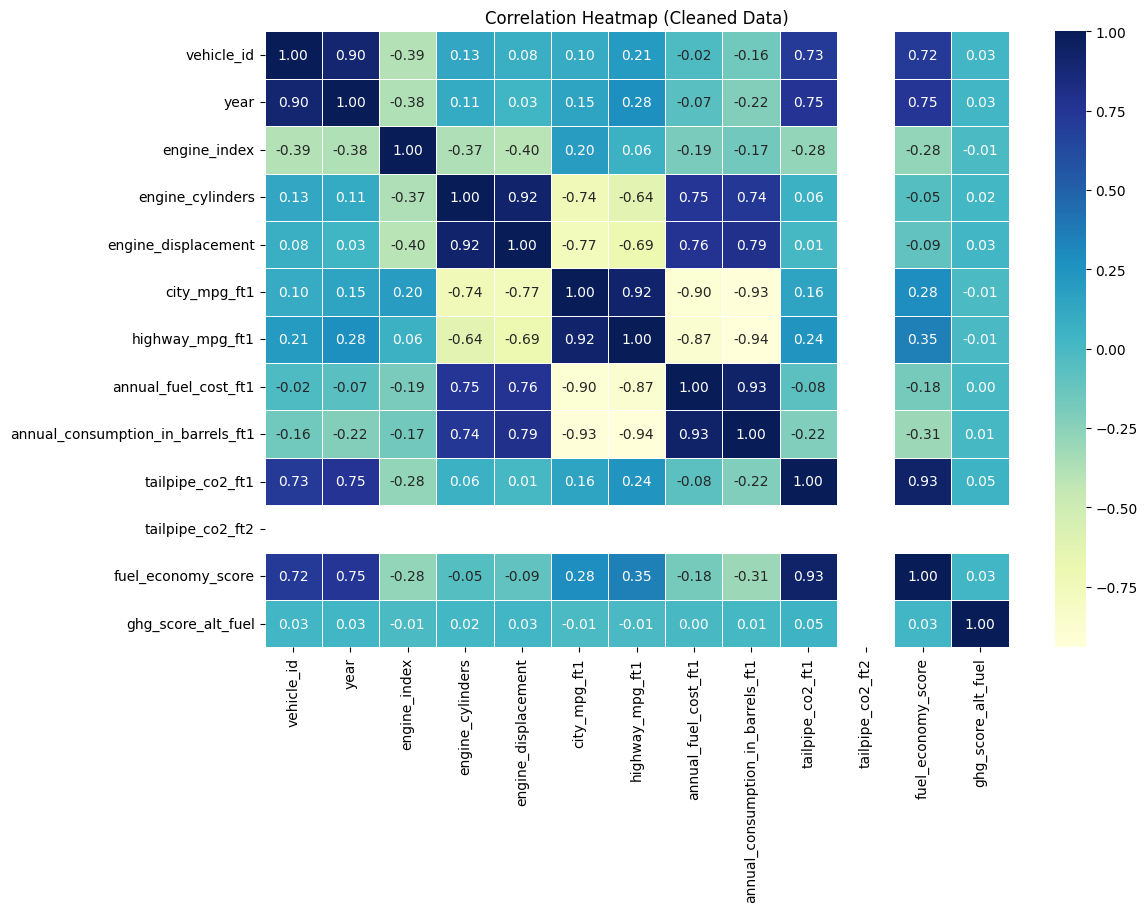

In [ ]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=['number'])

corr_cleaned = df_cleaned_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_cleaned, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Cleaned Data)')
plt.show()



In [ ]:
df_cleaned_numeric = df_cleaned.select_dtypes(include=['number'])
df_cleaned_numeric.corr()

,vehicle_id,year,engine_index,engine_cylinders,engine_displacement,city_mpg_ft1,highway_mpg_ft1,annual_fuel_cost_ft1,annual_consumption_in_barrels_ft1,tailpipe_co2_ft1,tailpipe_co2_ft2,fuel_economy_score,ghg_score_alt_fuel
vehicle_id,1.000000,0.901291,-0.392523,0.129712,0.076750,0.104501,0.207781,-0.022005,-0.158839,0.726791,NaN,0.721299,0.027178
year,0.901291,1.000000,-0.376511,0.106448,0.033765,0.145762,0.277513,-0.065928,-0.223421,0.752428,NaN,0.746734,0.028725
engine_index,-0.392523,-0.376511,1.000000,-0.370386,-0.403632,0.200700,0.064169,-0.191257,-0.165109,-0.276748,NaN,-0.275467,-0.010459
engine_cylinders,0.129712,0.106448,-0.370386,1.000000,0.918475,-0.739157,-0.637590,0.749589,0.735870,0.061616,NaN,-0.052687,0.019927
engine_displacement,0.076750,0.033765,-0.403632,0.918475,1.000000,-0.767038,-0.693222,0.760847,0.792668,0.006802,NaN,-0.094258,0.028429
city_mpg_ft1,0.104501,0.145762,0.200700,-0.739157,-0.767038,1.000000,0.917447,-0.901784,-0.927214,0.157739,NaN,0.280193,-0.011499
highway_mpg_ft1,0.207781,0.277513,0.064169,-0.637590,-0.693222,0.917447,1.000000,-0.874286,-0.941574,0.244460,NaN,0.354382,-0.008618
annual_fuel_cost_ft1,-0.022005,-0.065928,-0.191257,0.749589,0.760847,-0.901784,-0.874286,1.000000,0.929638,-0.083050,NaN,-0.182506,0.004855
annual_consumption_in_barrels_ft1,-0.158839,-0.223421,-0.165109,0.735870,0.792668,-0.927214,-0.941574,0.929638,1.000000,-0.215701,NaN,-0.305157,0.008471
tailpipe_co2_ft1,0.726791,0.752428,-0.276748,0.061616,0.006802,0.157739,0.244460,-0.083050,-0.215701,1.000000,NaN,0.926084,0.050834


# **Target Feature**

# **Identifying the most corelated feature Data & Scaling**

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

print('Shape before dropping: ',df_cleaned.shape)
df_cleaned['tailpipe_co2_ft1'] = df_cleaned['tailpipe_co2_ft1'].replace(-1, np.nan)


imputer = SimpleImputer(strategy='mean')
df_cleaned['tailpipe_co2_ft1'] = imputer.fit_transform(df_cleaned[['tailpipe_co2_ft1']])

X = df_cleaned.drop(['tailpipe_co2_ft1', 'engine_index', 'annual_fuel_cost_ft1', 'annual_consumption_in_barrels_ft1'], axis=1)
y = df_cleaned['tailpipe_co2_ft1']


categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns


ct = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('scaler', StandardScaler(), numerical_features)
])
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Shape before dropping:  (19995, 23)
(19995, 19)


## **Plot model method**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


def plot_model_performance(y_test, y_pred, model_name):


    # Actual vs Predicted scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='purple', s=100, edgecolor='black', linewidth=0.8)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Actual vs Predicted for {model_name}", fontsize=16, fontweight='bold')
    plt.xlabel("Actual", fontsize=12)
    plt.ylabel("Predicted", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
def print_model_metrics(y_test, y_pred, model_name):


    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import numpy as np

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Predictions: {y_pred[:5]}")
    print(f"Actual values: {y_test[:5].values}")
    print(f"Accuracy (R²): {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print('-' * 50)
    print('-'*50)


# **Linear Regression Model**

Linear Regression Model
Predictions: [408.79098785 404.68668909 408.53011287 405.04117021 410.43748182]
Actual values: [485.         408.04969778 408.04969778 408.04969778 408.04969778]
Accuracy (R²): 0.6932
Mean Absolute Error: 6.3706
Mean Squared Error: 209.8096
Root Mean Squared Error: 14.4848
--------------------------------------------------
--------------------------------------------------


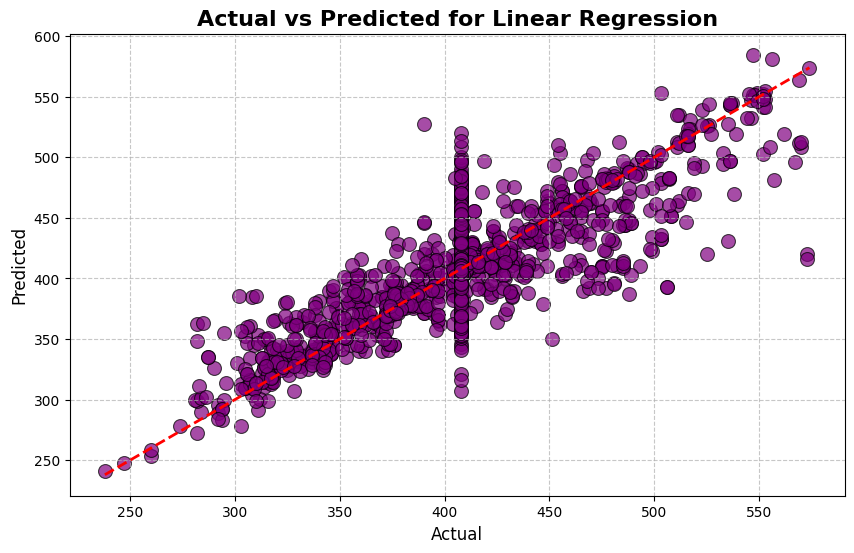

In [ ]:
lr_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model")
print_model_metrics(y_test, y_pred_lr, "Linear Regression")
plot_model_performance(y_test, y_pred_lr, "Linear Regression")

# **Random Forest Regressor Model**

Predictions: [486.78       408.04969778 408.04969778 408.04969778 408.04969778]
Actual values: [485.         408.04969778 408.04969778 408.04969778 408.04969778]
Accuracy (R²): 0.9964
Mean Absolute Error: 0.3999
Mean Squared Error: 2.4893
Root Mean Squared Error: 1.5778
--------------------------------------------------
--------------------------------------------------


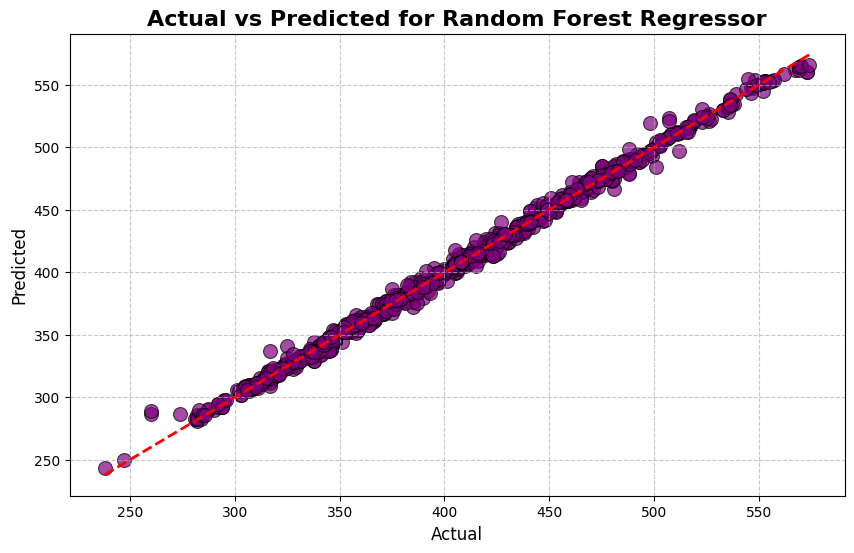

In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', rf_model)
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


print_model_metrics(y_test, y_pred_rf, "Random Forest Regressor")
plot_model_performance(y_test, y_pred_rf, "Random Forest Regressor")

# **K-Nearest Neighbors Model**

Predictions: [448.         408.04969778 408.04969778 408.04969778 408.04969778]
Actual values: [485.         408.04969778 408.04969778 408.04969778 408.04969778]
Accuracy (R²): 0.9428
Mean Absolute Error: 1.6104
Mean Squared Error: 39.1060
Root Mean Squared Error: 6.2535
--------------------------------------------------
--------------------------------------------------


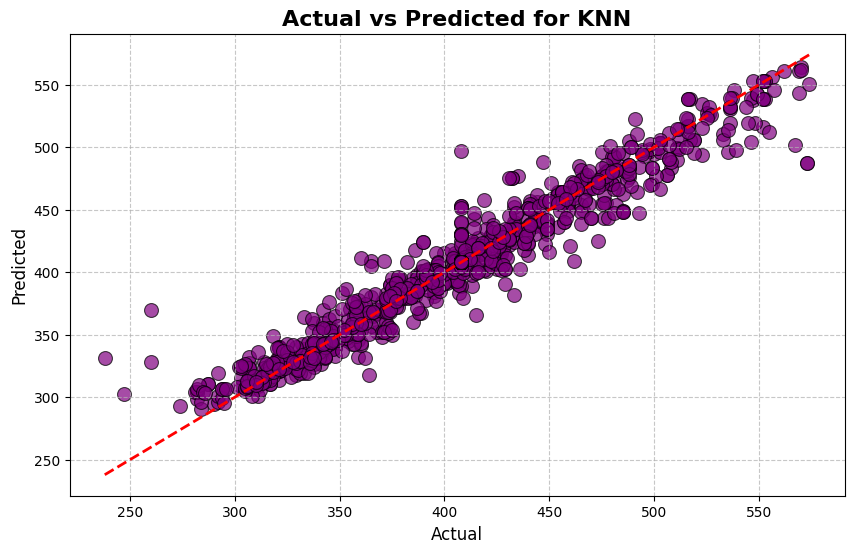

In [ ]:

from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', knn_model)
])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print_model_metrics(y_test, y_pred_knn, "KNN")
plot_model_performance(y_test, y_pred_knn, "KNN")

# **Decision Tree Regressor Model**

Predictions: [484.         408.04969778 408.04969778 408.04969778 408.04969778]
Actual values: [485.         408.04969778 408.04969778 408.04969778 408.04969778]
Accuracy (R²): 0.9945
Mean Absolute Error: 0.4099
Mean Squared Error: 3.7811
Root Mean Squared Error: 1.9445
--------------------------------------------------
--------------------------------------------------


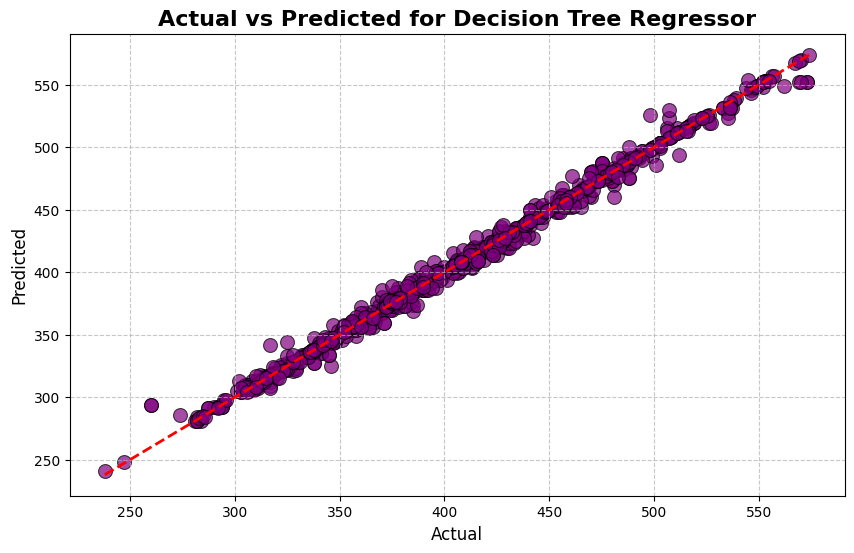

In [ ]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model', dt_model)
])

dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)




print_model_metrics(y_test, y_pred_dt, "Decision Tree Regressor")
plot_model_performance(y_test, y_pred_dt, "Decision Tree Regressor")

# **Comparison**

Model Performance Comparison
               Model       R^2       MAE         MSE       RMSE
0  Linear Regression  0.693245  6.370615  209.809566  14.484805
1      Random Forest  0.996360  0.399912    2.489304   1.577753
2                KNN  0.942824  1.610390   39.106007   6.253480
3      Decision Tree  0.994472  0.409902    3.781130   1.944513


<ipython-input-83-ea242336e876>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R^2", data=metrics_df, palette="viridis")
<ipython-input-83-ea242336e876>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=metrics_df, palette="viridis")
<ipython-input-83-ea242336e876>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=metrics_df, palette="coolwarm")
<ipython-input-83-ea242336e876>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

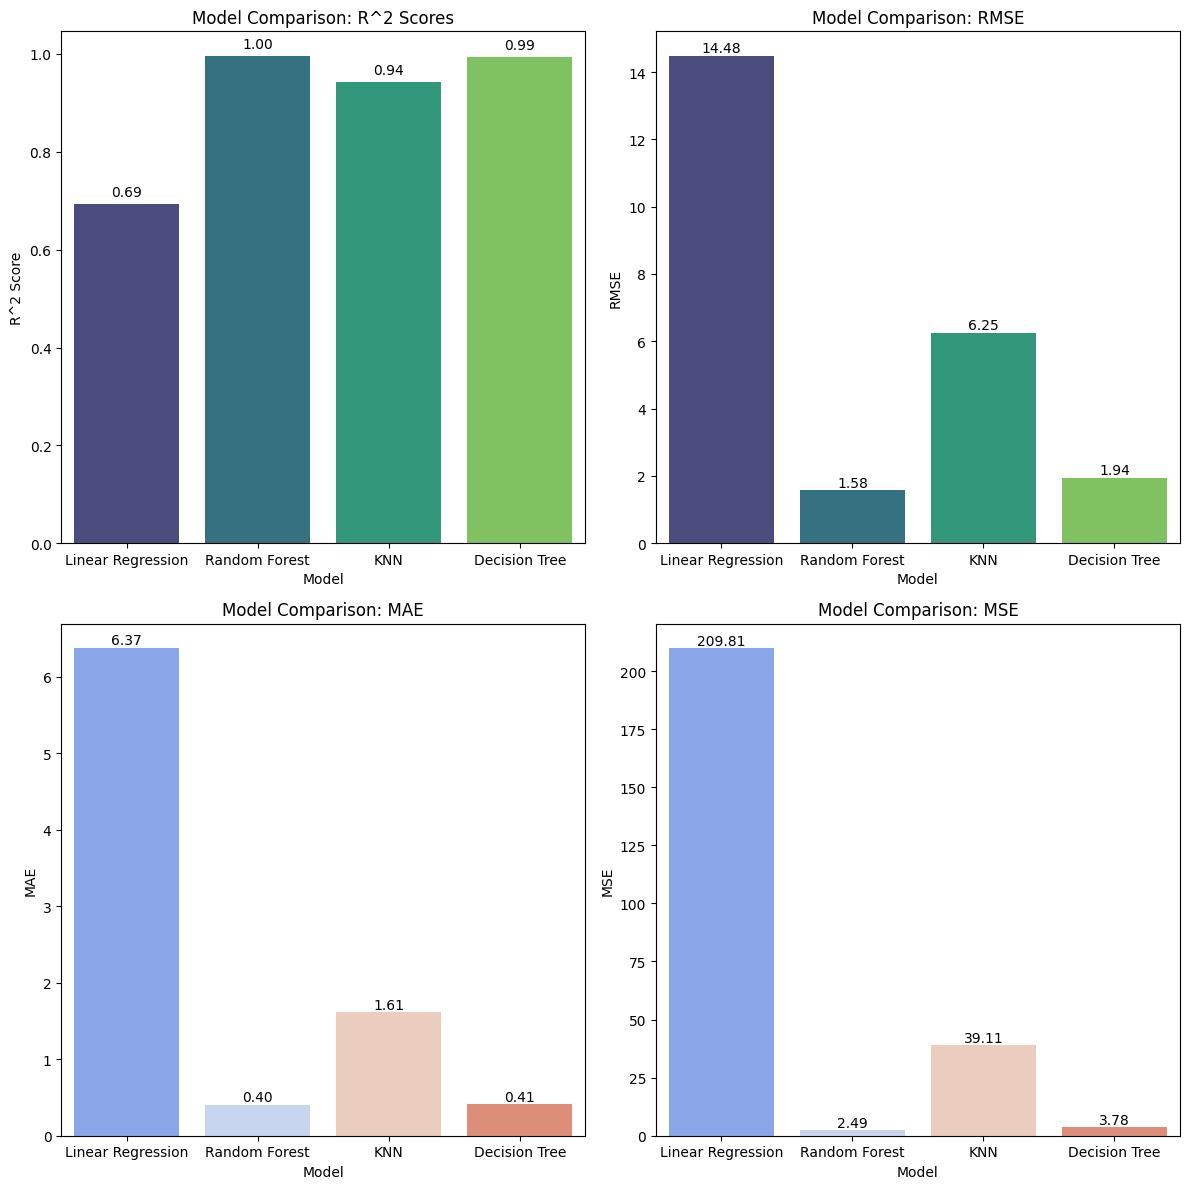

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

results = {}



# Store the metrics for each model in the 'results' dictionary
results["Linear Regression"] = {"R²": r2_score(y_test, y_pred_lr), "MAE": mean_absolute_error(y_test, y_pred_lr), "MSE": mean_squared_error(y_test, y_pred_lr), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr))}
results["Random Forest"] = {"R²": r2_score(y_test, y_pred_rf), "MAE": mean_absolute_error(y_test, y_pred_rf), "MSE": mean_squared_error(y_test, y_pred_rf), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))}
results["K-Nearest Neighbors"] = {"R²": r2_score(y_test, y_pred_knn), "MAE": mean_absolute_error(y_test, y_pred_knn), "MSE": mean_squared_error(y_test, y_pred_knn), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn))}
results["Decision Tree"] = {"R²": r2_score(y_test, y_pred_dt), "MAE": mean_absolute_error(y_test, y_pred_dt), "MSE": mean_squared_error(y_test, y_pred_dt), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt))}

# Step 1: Metrics for each model
metrics_data = {
    "Model": ["Linear Regression", "Random Forest", "KNN", "Decision Tree"],
    "R^2": [results["Linear Regression"]["R²"],
            results["Random Forest"]["R²"],
            results["K-Nearest Neighbors"]["R²"],
            results["Decision Tree"]["R²"]],
    "MAE": [results["Linear Regression"]["MAE"],
            results["Random Forest"]["MAE"],
            results["K-Nearest Neighbors"]["MAE"],
            results["Decision Tree"]["MAE"]],
    "MSE": [results["Linear Regression"]["MSE"],
            results["Random Forest"]["MSE"],
            results["K-Nearest Neighbors"]["MSE"],
            results["Decision Tree"]["MSE"]],
    "RMSE": [results["Linear Regression"]["RMSE"],
             results["Random Forest"]["RMSE"],
             results["K-Nearest Neighbors"]["RMSE"],
             results["Decision Tree"]["RMSE"]]
}

metrics_df = pd.DataFrame(metrics_data)



print("Model Performance Comparison")
print(metrics_df)


plt.figure(figsize=(12, 12))

# Bar plot for R^2
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="R^2", data=metrics_df, palette="viridis")
plt.title("Model Comparison: R^2 Scores")
plt.ylabel("R^2 Score")
plt.xlabel("Model")
for index, value in enumerate(metrics_df["R^2"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Bar plot for RMSE
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="RMSE", data=metrics_df, palette="viridis")
plt.title("Model Comparison: RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
for index, value in enumerate(metrics_df["RMSE"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Bar plot for MAE
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="MAE", data=metrics_df, palette="coolwarm")
plt.title("Model Comparison: MAE")
plt.ylabel("MAE")
plt.xlabel("Model")
for index, value in enumerate(metrics_df["MAE"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

# Bar plot for MSE
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="MSE", data=metrics_df, palette="coolwarm")
plt.title("Model Comparison: MSE")
plt.ylabel("MSE")
plt.xlabel("Model")
for index, value in enumerate(metrics_df["MSE"]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


bins = 3
binner = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
y_binned = binner.fit_transform(y.values.reshape(-1, 1)).astype(int).flatten()


X_train, X_test, y_train_binned, y_test_binned = train_test_split(
    X, y_binned, test_size=0.3, random_state=42
)


models = {
    "Linear Regression": Pipeline([
        ('preprocessor', ct),
        ('model', LinearRegression())
    ]),
    "Random Forest": Pipeline([
        ('preprocessor', ct),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    "KNN": Pipeline([
        ('preprocessor', ct),
        ('model', KNeighborsRegressor())
    ]),
    "Decision Tree": Pipeline([
        ('preprocessor', ct),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
}


f1_results = {}

for name, pipeline in models.items():

    pipeline.fit(X_train, y_train_binned)
    y_pred_binned = pipeline.predict(X_test)


    y_pred_binned = np.round(y_pred_binned).astype(int)
    y_pred_binned = np.clip(y_pred_binned, 0, bins - 1)


    precision = precision_score(y_test_binned, y_pred_binned, average='macro')
    recall = recall_score(y_test_binned, y_pred_binned, average='macro')
    f1 = f1_score(y_test_binned, y_pred_binned, average='macro')

    f1_results[name] = {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    }


for name, metrics in f1_results.items():
    print(f"{name}:\n  Precision: {metrics['Precision']:.2f}\n  Recall: {metrics['Recall']:.2f}\n  F1 Score: {metrics['F1 Score']:.2f}\n")


Linear Regression:
  Precision: 0.77
  Recall: 0.71
  F1 Score: 0.73

Random Forest:
  Precision: 0.99
  Recall: 0.94
  F1 Score: 0.96

KNN:
  Precision: 0.94
  Recall: 0.80
  F1 Score: 0.85

Decision Tree:
  Precision: 0.97
  Recall: 0.94
  F1 Score: 0.96



Confusion Matrix for Linear Regression:


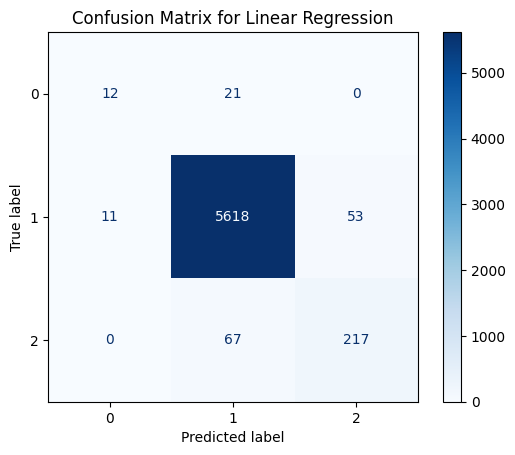

Confusion Matrix for Random Forest:


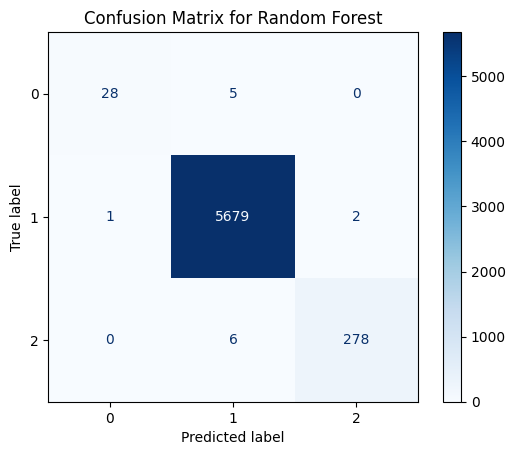

Confusion Matrix for KNN:


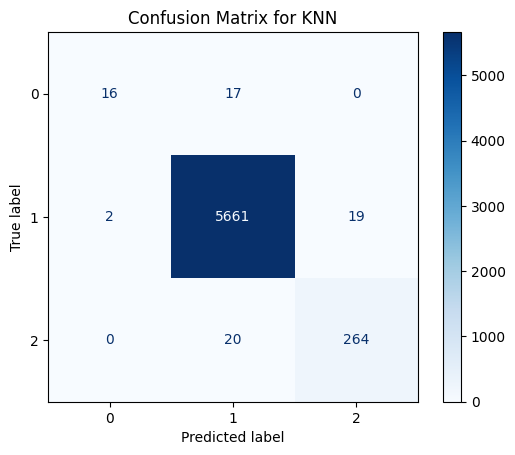

Confusion Matrix for Decision Tree:


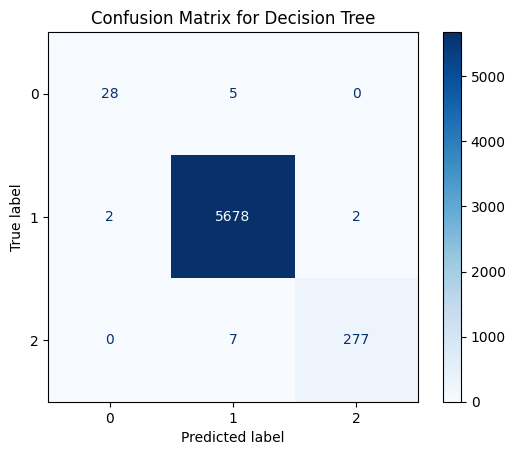

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to display confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    """
    Plots and prints the confusion matrix for a given model.
    """
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


for name, pipeline in models.items():

    pipeline.fit(X_train, y_train_binned)
    y_pred_binned = pipeline.predict(X_test)


    y_pred_binned = np.round(y_pred_binned).astype(int)
    y_pred_binned = np.clip(y_pred_binned, 0, bins - 1)


    print(f"Confusion Matrix for {name}:")
    plot_confusion_matrix(y_test_binned, y_pred_binned, name)


In [ ]:
from sklearn.metrics import confusion_matrix

# Function to display confusion matrix in tabular form
def print_confusion_matrix(y_test, y_pred, model_name):
    """
    Prints the confusion matrix for a given model in a tabular format.
    """
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print("Actual \\ Predicted |", " | ".join([f"Class {i}" for i in range(cm.shape[1])]))
    print("-" * (19 + cm.shape[1] * 8))  # Adjust for formatting
    for i, row in enumerate(cm):
        print(f"Class {i:<2}             |", " | ".join([f"{x:<6}" for x in row]))
    print("\n")

# Generate tabular confusion matrix for each model
for name, pipeline in models.items():
    # Train the model
    pipeline.fit(X_train, y_train_binned)
    y_pred_binned = pipeline.predict(X_test)

    # Convert predictions to nearest bins
    y_pred_binned = np.round(y_pred_binned).astype(int)
    y_pred_binned = np.clip(y_pred_binned, 0, bins - 1)  # Ensure predictions are within valid bin range

    # Print confusion matrix
    print_confusion_matrix(y_test_binned, y_pred_binned, name)


Confusion Matrix for Linear Regression:
Actual \ Predicted | Class 0 | Class 1 | Class 2
-------------------------------------------
Class 0              | 12     | 21     | 0     
Class 1              | 11     | 5618   | 53    
Class 2              | 0      | 67     | 217   


Confusion Matrix for Random Forest:
Actual \ Predicted | Class 0 | Class 1 | Class 2
-------------------------------------------
Class 0              | 28     | 5      | 0     
Class 1              | 1      | 5679   | 2     
Class 2              | 0      | 6      | 278   


Confusion Matrix for KNN:
Actual \ Predicted | Class 0 | Class 1 | Class 2
-------------------------------------------
Class 0              | 16     | 17     | 0     
Class 1              | 2      | 5661   | 19    
Class 2              | 0      | 20     | 264   


Confusion Matrix for Decision Tree:
Actual \ Predicted | Class 0 | Class 1 | Class 2
-------------------------------------------
Class 0              | 28     | 5      | 0     
Clas